In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct

In [3]:
plt.rcParams['figure.figsize'] = (12,6)
#plt.rcParams['pcolor.shading'] = 'flat'

* IMG format is binary, 16-bit, topo unit is m
* 16 pixels per degree
* got median topography from gridded data sets (randomly selected from list)

DATA_SET_ID                   = "MGS-M-MOLA-5-MEGDR-L3-V1.0" <br>
PRODUCT_ID                    = "MEGT90N000EB.IMG"           <br>
SPACECRAFT_NAME               = "MARS GLOBAL SURVEYOR"       <br>
INSTRUMENT_ID                 = MOLA                         <br>
INSTRUMENT_NAME               = "MARS ORBITER LASER ALTIMETER" <br>

Relevant web site: https://pds-geosciences.wustl.edu/dataserv/default.htm <br>
Data website: https://pds-geosciences.wustl.edu/missions/mgs/megdr.html <br>
Select MGS --> MOLA --> MEGDR --> submit 
Returns a long list of .IMG files. I randomly selected one (MEGT90N000EB.IMG); it appears to be the whole planet's median topography.

In [4]:
ppd = 16        # 16 pixels per degree
nlats = 180*ppd
nlons = 360*ppd
topom = np.zeros([nlats,nlons])
# for the quadrilateral interpretation of np.pcolormesh (shading='flat') the lat and lon array need to mark 
# the boundaries of the quadrilaterals and thus each have one more element than there are pixel (topo) values:
lats = np.arange(90,-90-1/ppd,-1/ppd)
lons = np.arange(0,360+1/ppd,1/ppd)


In [5]:
datablock = open('topography/megt90n000eb.img','rb')

for irow in range(nlats):
    a = datablock.read(2*nlons)      # read all bytes that represent topo values for all longitudes and one latitutde
    row = struct.unpack('>5760h',a)  # read 5760 big-endian 2-byte integers from one latitude "row" of the binary file
    topom[irow] = row                # store topo values (now integers) in a row of 2D array topom

datablock.close()
topo = 0.001*topom                   # convert topo values to km

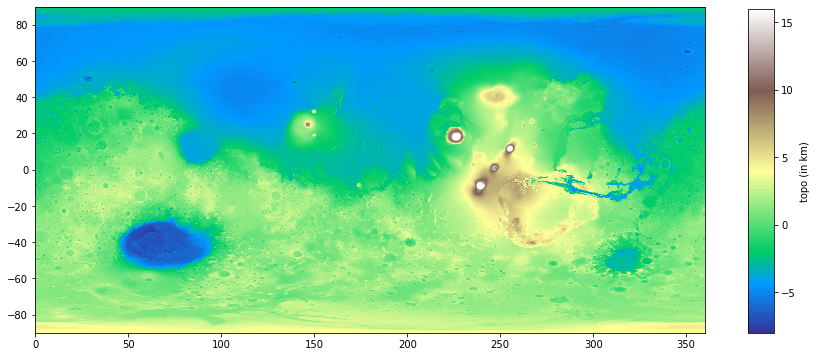

In [6]:
X,Y = np.meshgrid(lons, lats)
plt.pcolormesh(X,Y,topo,cmap='terrain',vmin=-8,vmax=16)
barea = plt.axes([0.95, 0.125, 0.03, 0.75])
plt.colorbar(cax=barea, label = 'topo (in km)')

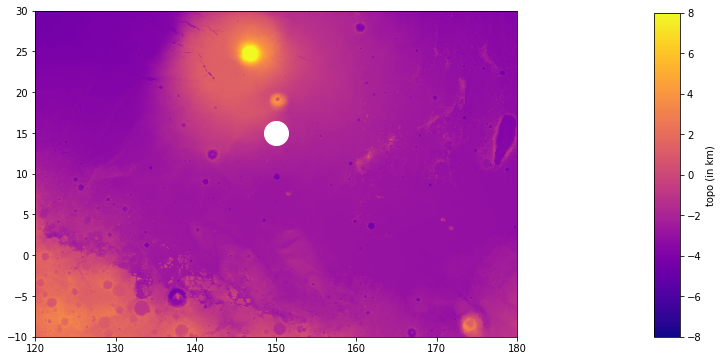

In [7]:
# plot a portion of the map between latmin and -max and lonmin  and -max:

latmin = -10; latmax = 30
lonmin = 120; lonmax = 180
y0 = (90-latmax)*16; y9 = (90-latmin)*16
x0 = lonmin*16; x9 = lonmax*16

X,Y = np.meshgrid(lons[x0:x9+1], lats[y0:y9+1])
plt.pcolormesh(X,Y,topo[y0:y9,x0:x9],cmap='plasma',vmin=-8,vmax=8)


# plot a random example point on the map:
lat1 = 15; lon1 = 150
plt.plot(lon1,lat1,'wo',markersize=24)




plt.gca().set_aspect(1/np.cos(np.radians(0.5*(latmin+latmax))))  # correct for dissimilar distance for one degree of lat and lon

barea = plt.axes([0.95, 0.125, 0.03, 0.75])
plt.colorbar(cax=barea, label = 'topo (in km)')


In [24]:
import matplotlib

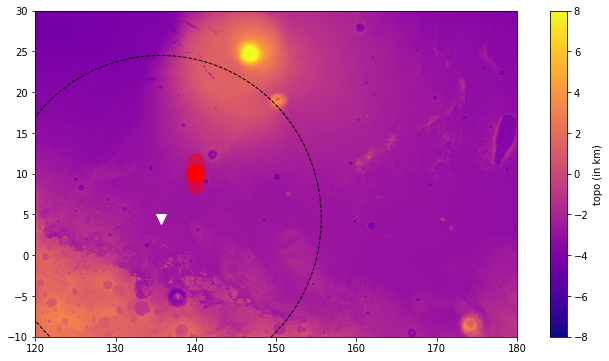

In [40]:
# plot a portion of the map between latmin and -max and lonmin  and -max:

fig, axs = plt.subplots(nrows=1, sharex=True)

latmin = -10; latmax = 30
lonmin = 120; lonmax = 180
y0 = (90-latmax)*16; y9 = (90-latmin)*16
x0 = lonmin*16; x9 = lonmax*16

X,Y = np.meshgrid(lons[x0:x9+1], lats[y0:y9+1])
im = axs.pcolormesh(X,Y,topo[y0:y9,x0:x9],cmap='plasma',vmin=-8,vmax=8)


# plot distance circles from lander
# lander:
lat=4.5024; long=135.6234 
lander = axs.plot(long,lat,'wv', markersize=10)

degree20 = plt.Circle((long, lat), 20, color='k', linestyle='--', fill=False)
axs.add_patch(degree20)

# plot example epicenter
circle1 = plt.Circle((140, 10), 1, color='r')
axs.add_patch(circle1)

# adding elipse of error
ellipse1 = matplotlib.patches.Ellipse((140,10), 2.3, 5, color='r', alpha=0.5)
axs.add_patch(ellipse1)

fig.gca().set_aspect(1/np.cos(np.radians(0.5*(latmin+latmax))))  # correct for dissimilar distance for one degree of lat and lon

fig.colorbar(im, label='topo (in km)')